# Ⅰ. Hand Craft Model

#### 0. 라이브러리

In [120]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from music21 import converter, corpus, instrument, midi, note, chord, pitch

#### 1. Midi Stream 불러오기
- mid.tracks[i].events
- mid.tracks[i].events.channel ( channel 의 유무 먼저 파악 )
- mid.parts.stream() // instruments set ( Piano 1개 ) : len(mid.parts) = 2 Right / Left
- mid.parts.stream().partName
- mid_stream[0].getElementsByClass('Measure').stream().getElementsByOffset(0).hightestTime // part -> measure 호출

In [39]:
def open_midi_folder(file_name):
    mid = midi.MidiFile()
    mid.open(file_name)
    
    mid.read()
    mid.close()
    
    mid_stream = midi.translate.midiFileToStream(mid)
    
    return mid, mid_stream
    

#### 2. Midi Data 불러오기

#### (1). Midi Parts Stream 

In [65]:
def midi_parts_stream(mid, mid_stream):
    mid_part_stream = mid_stream.parts.stream()
    print(f"stream len: ({len(mid_part_stream.parts)})")
    
    #for part_stream in mid_part_stream:
    #    print(part_stream.partName)

#### (2). 음표(notes) 추출

In [149]:
def extract_notes(mid_part):
    parent_element = []
    ret = []
    for nt in mid_part.flat.notes:
        if isinstance(nt, note.Note):
            ret.append(max(0,0, nt.pitch.ps))
            parent_element.append(nt)
        elif isinstance(nt, chord.Chord):
            k = 1
            for pitch in nt.pitches:
                ret.append(max(0,0, pitch.ps))
                parent_element.append(nt)
        
    return ret, parent_element

#### (3). Midi Countour ( 윤곽 )
- Pitch ( 음정 / 음높이 )
    + 음의 높낮이 : frequency 와 연관 있음 = 피아노 키보드 전체 pitch 수 ( 1008개 )
    + 음 높이 : C1 - C8 ( 84개 ) + 반음 (12개) = 84*12 = 1008개 pitch
    + 피아노 최소 pitch : C1 최대 pitch : C8

In [150]:
def midi_countour(mid_stream):
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(1, 1, 1) # row, col, subplot index
    
    minPitch = pitch.Pitch('C10').ps
    maxPitch = 0
    xMax = 0
    
    for i in range(len(mid_stream.parts)):
        top = mid_stream.parts[i].flat.notes

        y, parent_element = extract_notes(mid_stream.parts[i])
        if(len(y)<1):continue
        
        x = [n.offset for n in parent_element]
        print(x)
        
        break

#### 1. Midi 파일 처리

In [108]:
print(note.Note)

<class 'music21.note.Note'>


In [112]:
print(chord.Chord)

<class 'music21.chord.Chord'>


In [158]:
def midi_file_processing(midi_folder):
    current_dir   = os.getcwd()
    midi_data_dir = os.path.join(current_dir, midi_folder)
    
    midi_file_list = os.listdir(midi_data_dir)
    for file in midi_file_list:
        file_name = os.path.join(midi_data_dir, file)
        
        mid, mid_stream = open_midi_folder(file_name)
        
        # mid_stream.parts
        midi_parts_stream(mid, mid_stream)
        
        #midi_countour(mid_stream)
        timeSignature = mid_stream.getTimeSignatures()[0]
        print(timeSignature)
        music_analysis = mid_stream.analyze('key')
        print(music_analysis)
        
        print("Music time signature: {0}/{1}".format(timeSignature.beatCount, timeSignature.denominator))
        print("Expected music key: {0}".format(music_analysis))
        print("Music key confidence: {0}".format(music_analysis.correlationCoefficient))
        print("Other music key alternatives:")
        for analysis in music_analysis.alternateInterpretations:
            if (analysis.correlationCoefficient > 0.5):
                print(analysis)
        temp_midi_chords = mid_stream.chordify()
        print(temp_midi_chords)
        
        temp_midi = stream.Score()
        temp_midi.insert(0, temp_midi_chords)
        
        print_pa
        break
        
        
midi_data_dir = "midi_data"

midi_file_processing(midi_data_dir)

stream len: (2)
<music21.meter.TimeSignature 4/4>
d minor
Music time signature: 4/4
Expected music key: d minor
Music key confidence: 0.8160858611403101
Other music key alternatives:
g minor
B- major
F major
G major
<music21.stream.Part 0x21a33f99cc8>


In [51]:
midi_data_dir = "midi_data"

midi_file_processing(midi_data_dir)

C:\Users\user\Desktop\SKP\AILab\AILab_231003\개발\midi_data\green-hill-zone.mid
C:\Users\user\Desktop\SKP\AILab\AILab_231003\개발\midi_data\jesu1.mid
C:\Users\user\Desktop\SKP\AILab\AILab_231003\개발\midi_data\jesu2.mid
C:\Users\user\Desktop\SKP\AILab\AILab_231003\개발\midi_data\MIDI_sample.mid


In [44]:
file_list

['green-hill-zone.mid', 'jesu1.mid', 'jesu2.mid', 'MIDI_sample.mid']

### [0]. 라이브러리

In [11]:
import os
import numpy as np
import pandas as pd

from music21 import converter, corpus, instrument, midi, note, chord, pitch, stream

### [1]. 데이터 불러오기
- https://www.bachcentral.com/index.html
- [해야할 것]
    - museScore4 설치하기

In [27]:
folder = "bach_midifile\cantatas\jesu1.mid"
file_name = os.path.join(os.getcwd(), folder)

def open_midi(file_name):
    mid = midi.MidiFile()
    mid.open(file_name)
    
    mid.read()
    mid.close()
    
    mid_stream = midi.translate.midiFileToStream(mid)
    
    return mid_stream
    
mid_stream = open_midi(file_name)




In [31]:
def list_instruments(midi):
    partStream = midi.parts.stream()
    print("List of instruments found on MIDI file:")
    for p in partStream:
        aux = p
        print (p.partName)

list_instruments(mid_stream)

List of instruments found on MIDI file:
Jesu, Joy of Man's
Desiring
by J.S. Bach
Arranged by
John Renfro Davis
Cut-N-Shoot, Tx


In [22]:
from music21 import converter, corpus, instrument, midi, note, chord, pitch

def open_midi(midi_path):
    # There is an one-line method to read MIDIs
    # but to remove the drums we need to manipulate some
    # low level MIDI events.
    mf = midi.MidiFile()
    mf.open(midi_path)
    mf.read()
    mf.close()

    return midi.translate.midiFileToStream(mf)
    
base_midi = open_midi("green-hill-zone.mid")
base_midi



<music21.stream.Score 0x277fc0e2a08>

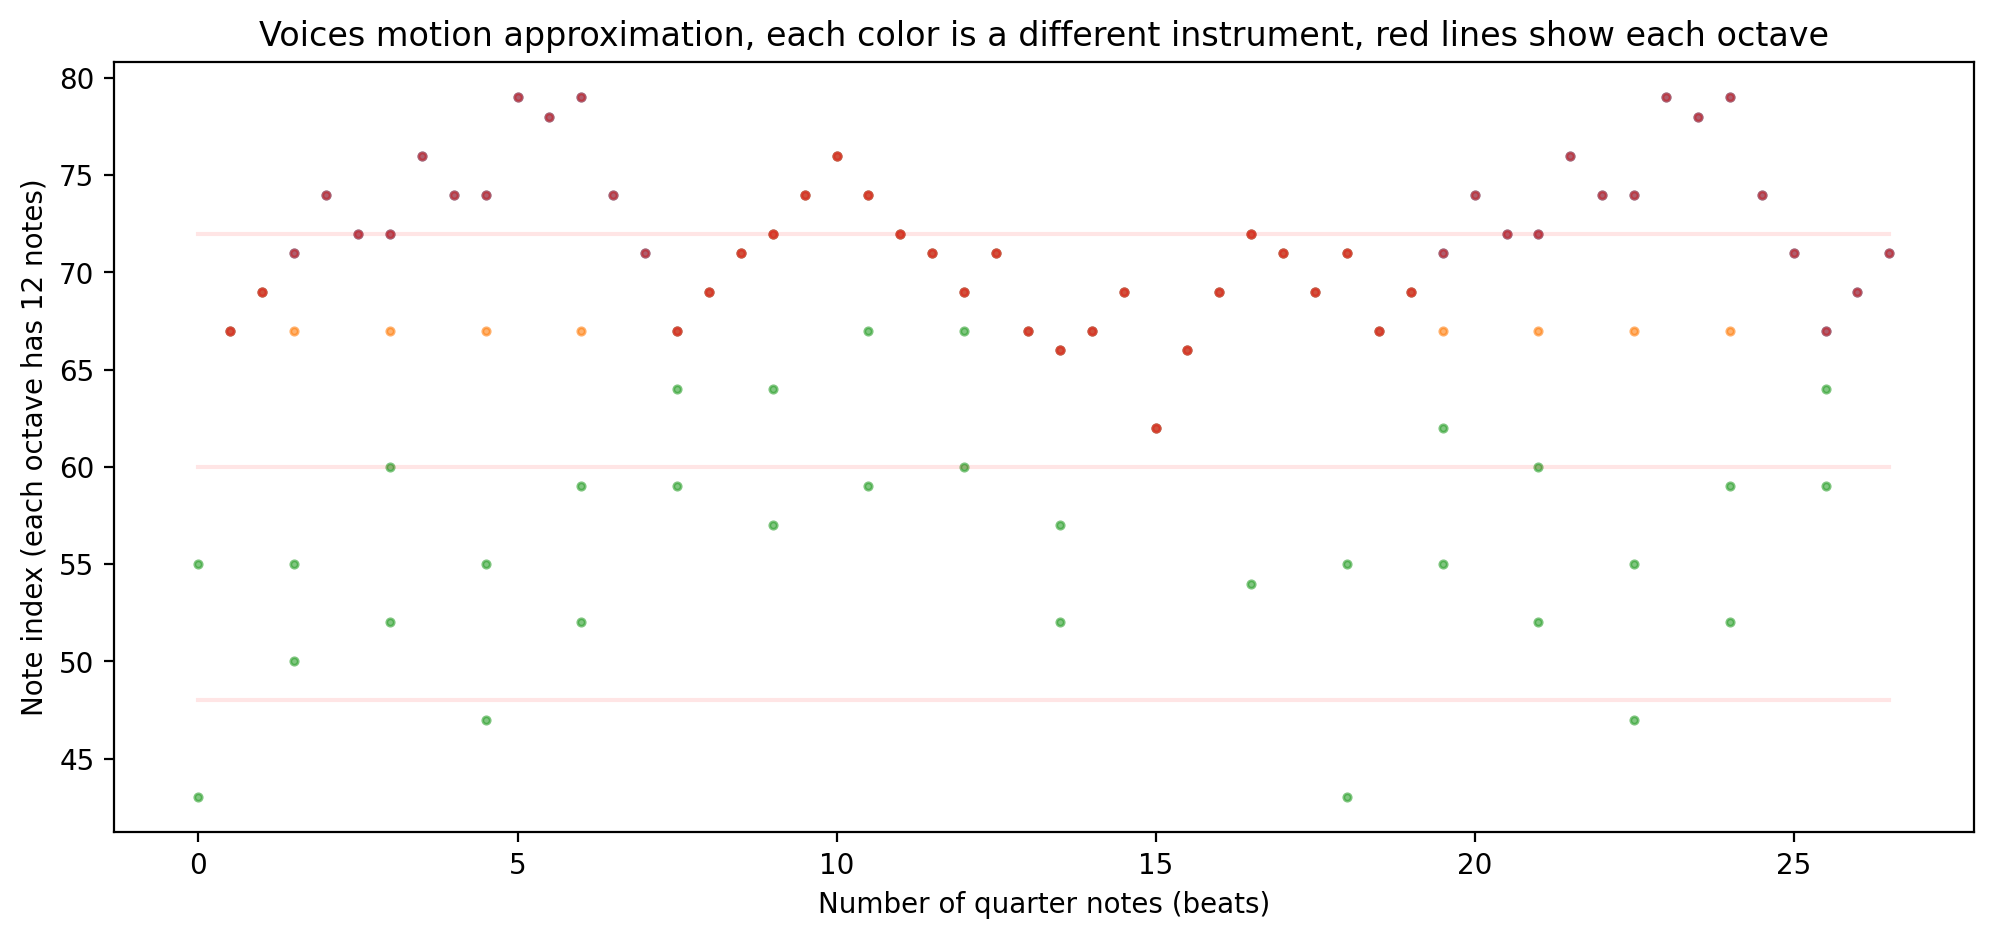

In [33]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def extract_notes(midi_part):
    parent_element = []
    ret = []
    for nt in midi_part.flat.notes:        
        if isinstance(nt, note.Note):
            ret.append(max(0.0, nt.pitch.ps))
            parent_element.append(nt)
        elif isinstance(nt, chord.Chord):
            for pitch in nt.pitches:
                ret.append(max(0.0, pitch.ps))
                parent_element.append(nt)
    
    return ret, parent_element

def print_parts_countour(midi):
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(1, 1, 1)
    minPitch = pitch.Pitch('C10').ps
    maxPitch = 0
    xMax = 0
    
    # Drawing notes.
    for i in range(len(midi.parts)):
        top = midi.parts[i].flat.notes                  
        y, parent_element = extract_notes(top)
        if (len(y) < 1): continue
            
        x = [n.offset for n in parent_element]
        ax.scatter(x, y, alpha=0.6, s=7)
        
        aux = min(y)
        if (aux < minPitch): minPitch = aux
            
        aux = max(y)
        if (aux > maxPitch): maxPitch = aux
            
        aux = max(x)
        if (aux > xMax): xMax = aux
    
    for i in range(1, 10):
        linePitch = pitch.Pitch('C{0}'.format(i)).ps
        if (linePitch > minPitch and linePitch < maxPitch):
            ax.add_line(mlines.Line2D([0, xMax], [linePitch, linePitch], color='red', alpha=0.1))            

    plt.ylabel("Note index (each octave has 12 notes)")
    plt.xlabel("Number of quarter notes (beats)")
    plt.title('Voices motion approximation, each color is a different instrument, red lines show each octave')
    plt.show()

# Focusing only on 6 first measures to make it easier to understand.
print_parts_countour(mid_stream.measures(0, 6))

<music21.graph.plot.HistogramPitchClass for <music21.stream.Score 0x277f9d37c48>>

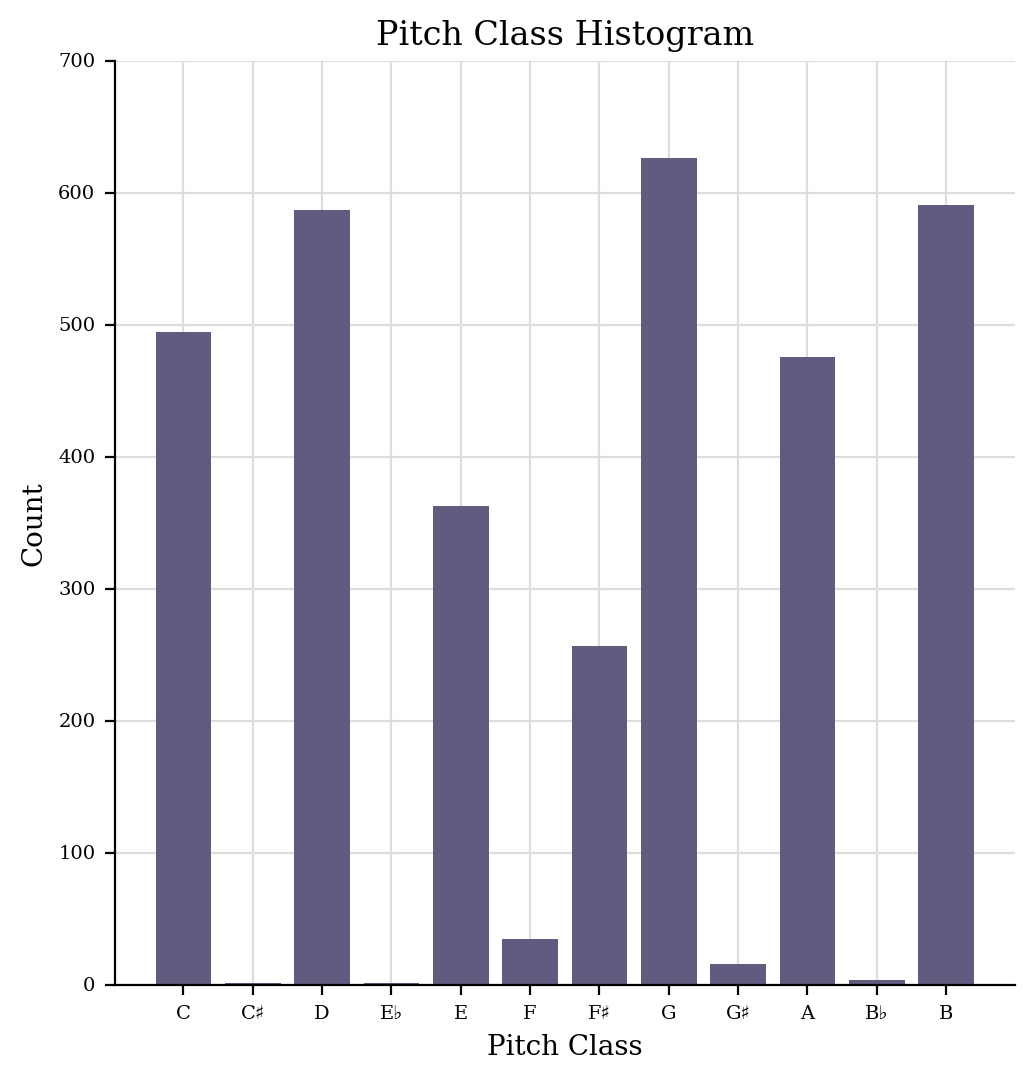

In [34]:
mid_stream.plot('histogram', 'pitchClass', 'count')

In [39]:
mid_stream.part

AttributeError: 'Score' object has no attribute 'part'